# **By: Caleb Choo**


# **Basic Image Augmentation Using OpenCV**
A simple face detection model using OpenCV, where we will check for the number of faces and draw a rectangle around the face detected.


## **Importing Libraries**

In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.patches as patches
from pathlib import Path
import os

## **Loading Image**

Image successfully loaded!


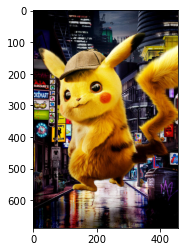

In [26]:
img_ = cv2.imread('pikachu.jpeg')

# converting to rgb
img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

plt.imshow(img)
print('Image successfully loaded!')

In [27]:
#Checking for shape of image
img.shape

(687, 458, 3)

## **Cropping Center Of Image**


In [28]:
def crop_center(img, crop_pixels = 100):
    return img[crop_pixels:img.shape[0] - crop_pixels, crop_pixels:img.shape[1] - crop_pixels]

Cropped the center by 100 pixels


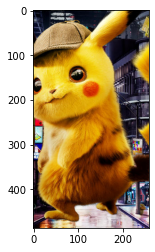

In [29]:
crop = crop_center(img)
plt.imshow(crop)
print('Cropped the center by 100 pixels')

## **Random Cropping**


In [30]:
def crop_random(img, row_crop_pix = 100):
    rows, cols, _ = img.shape
    cols_crop_pix = round(row_crop_pix*cols/rows)
    row_crop_pix = int(np.floor(2*random.uniform(0, 1)*row_crop_pix))
    cols_crop_pix = int(np.floor(2*random.uniform(0, 1)*cols_crop_pix).astype(int))
    return img[row_crop_pix:rows - row_crop_pix, cols_crop_pix:cols - cols_crop_pix]

Image randomly cropped!


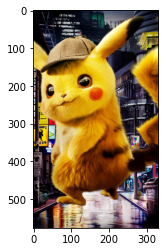

In [31]:
random_crop = crop_random(img)
plt.imshow(random_crop)
print('Image randomly cropped!')

Image randomly cropped!


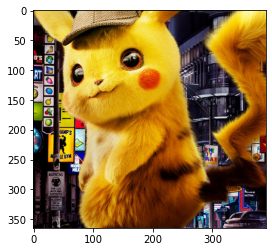

In [32]:
#to prove that the crop is random, let's repeat the process
random_crop2 = crop_random(img)
plt.imshow(random_crop2)
print('Image randomly cropped!')

## **Resizing the imaage**


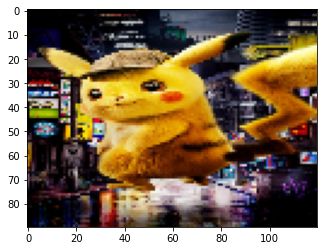

In [33]:
resized = cv2.resize(img, (120, 90))
plt.imshow(resized)

## **Vertical Image Flip**


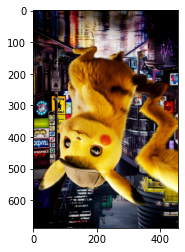

In [34]:
vert_flip = np.flip(img, 0)
plt.imshow(vert_flip)

## **Horizontal Image Flip**


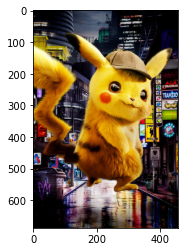

In [35]:
hori_flip = np.flip(img, 1)
plt.imshow(hori_flip)

## **Rotate Image**


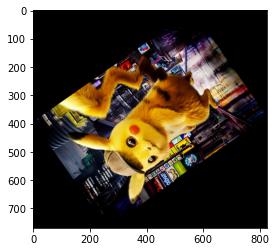

In [36]:
from scipy import ndimage
rotated = ndimage.rotate(img, 125)
plt.imshow(rotated)

## **Changing brightness and contrast**


In [37]:
def brightness_contrast_loop (image, alpha = 1, beta = 0):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range (image.shape[0]):
        for x in range (image.shape[1]):
            for c in range (image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0 , 255)
    return new_image

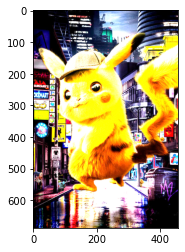

In [38]:
brightened_img = brightness_contrast_loop(img, alpha = 2.5)
plt.imshow(brightened_img)

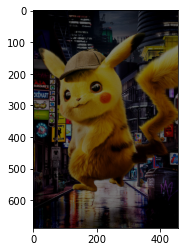

In [39]:
darkened_img = brightness_contrast_loop(img, alpha = .5)
plt.imshow(darkened_img)

## **Creating bounding boxes**


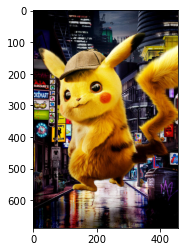

In [40]:
plt.imshow(img)

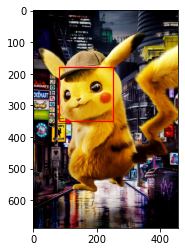

In [41]:
xmin = 80
ymin= 180
xmax = 250
ymax = 350

fig,ax = plt.subplots(1)
ax.imshow(img)
#make rectangular bounding box
bb = patches.Rectangle(xy=(xmin,ymin),width=xmax-xmin,height=ymax-ymin,linewidth=1.2,edgecolor='r',facecolor='none')
ax.add_patch(bb) #add bounding box to image
plt.show()

## **Turning images into grayscale**


Image successfully loaded in grayscale


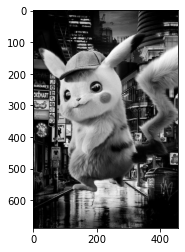

In [43]:
img = cv2.imread('pikachu.jpeg')

# converting to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap = 'gray')
print('Image successfully loaded in grayscale')